In [74]:
#Import required packages
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [75]:
# Import Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [76]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [77]:
#Declare base
Base = automap_base()

In [78]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)

In [79]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [80]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [81]:
#Create inspector
inspector = inspect(engine)

In [82]:
#View the columns of the Measurement table
columns_m = inspector.get_columns('measurement')

for i in columns_m:
    print(i['name'], i['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [83]:
#View the columns of the Station table
columns_s = inspector.get_columns('station')

for i in columns_s:
    print(i['name'], i['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [84]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [85]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

recent_date

('2017-08-23',)

In [86]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_date = recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
plot_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_date).\
        order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
plot_df = pd.DataFrame(plot_data, columns=["Date", "Precipitation"])
plot_df = plot_df.dropna(how='any')

plot_df.head(10)

,Date,Precipitation
0,2016-08-23,0.0
1,2016-08-23,3.8
2,2016-08-23,1.3
4,2016-08-23,0.5
5,2016-08-23,45.5
6,2016-08-23,17.8
7,2016-08-24,2.0
8,2016-08-24,54.6
9,2016-08-24,57.9
11,2016-08-24,31.0


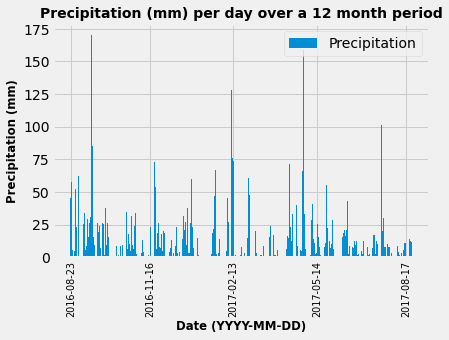

In [101]:
# Sort the dataframe by date
# (Already done via order_by() query)

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(plot_df['Date'], plot_df['Precipitation'], label="Precipitation")
plt.title("Precipitation (mm) per day over a 12 month period", fontweight='bold', fontsize='medium')
plt.xlabel("Date (YYYY-MM-DD)", fontweight='bold', fontsize='small')
plt.ylabel("Precipitation (mm)", fontweight='bold', fontsize='small')

#Set x ticks
ticks = list(plot_df['Date'])
plt.xticks([ticks[i] for i in range(len(ticks)) if i % 500 == 0], rotation='90', fontsize='x-small')

#Save and display plot
plt.legend()
# plt.tight_layout()
plt.savefig("Precipitation (mm) per day over a 12 month period.png")
plt.show()

In [106]:
# Use Pandas to calculate the summary statistics for the precipitation data


TypeError: '<=' not supported between instances of 'int' and 'numpy.str_'

In [108]:
# Use Pandas to calculate the summary statistics for the precipitation data
plot_df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(12.2, 29.4, 22.03582251082252)]

Text(0.5, 4.183333333333314, 'Temperature')

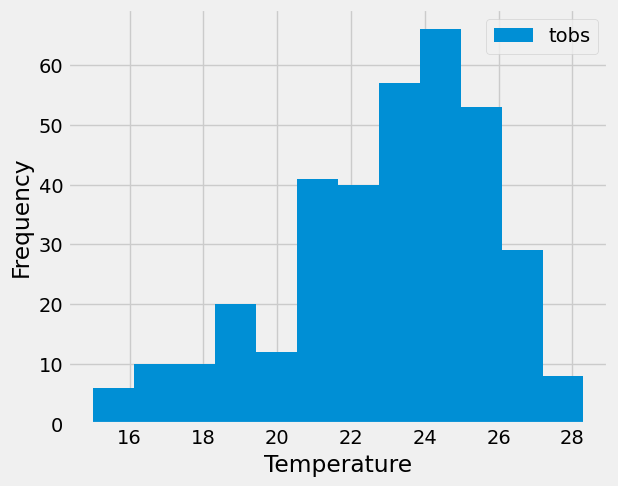

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()